# AAROKSH CHAUHAN , ROLL NO - 25CL05014
# LAB 6 

**OPENING THE DATA FILE**

In [16]:
import xarray as xr
pt = "C:/Users/user/Desktop/Aaroksh/HadlSST/HadISST_sst.nc"
ds = xr.open_dataset(pt)
ds

<xarray.Dataset>
Dimensions:    (time: 1868, nv: 2, latitude: 180, longitude: 360)
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2025-0...
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) float32 ...
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    6/10/2025 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

**READING THE SST VALUES AND PLOTTING THE SPATIAL PLOT**

[[[-1000.  -1000.  -1000.  ... -1000.  -1000.  -1000. ]
  [-1000.  -1000.  -1000.  ... -1000.  -1000.  -1000. ]
  [-1000.  -1000.  -1000.  ... -1000.  -1000.  -1000. ]
  ...
  [    nan     nan     nan ...     nan     nan     nan]
  [    nan     nan     nan ...     nan     nan     nan]
  [    nan     nan     nan ...     nan     nan     nan]]

 [[-1000.  -1000.  -1000.  ... -1000.  -1000.  -1000. ]
  [-1000.  -1000.  -1000.  ... -1000.  -1000.  -1000. ]
  [-1000.  -1000.  -1000.  ... -1000.  -1000.  -1000. ]
  ...
  [    nan     nan     nan ...     nan     nan     nan]
  [    nan     nan     nan ...     nan     nan     nan]
  [    nan     nan     nan ...     nan     nan     nan]]

 [[-1000.  -1000.  -1000.  ... -1000.  -1000.  -1000. ]
  [-1000.  -1000.  -1000.  ... -1000.  -1000.  -1000. ]
  [-1000.  -1000.  -1000.  ... -1000.  -1000.  -1000. ]
  ...
  [    nan     nan     nan ...     nan     nan     nan]
  [    nan     nan     nan ...     nan     nan     nan]
  [    nan     nan     nan

<Figure size 1800x1800 with 0 Axes>

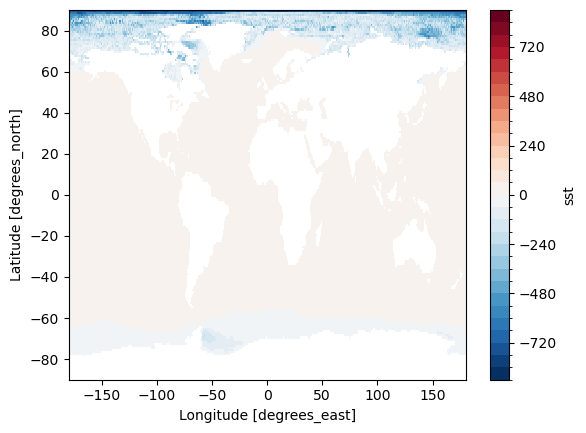

<Figure size 1800x1800 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
SST = ds["sst"]                 # DEFINING THE VARIABLE sst AS SST
print(SST.values)
sp_mean = SST.mean(dim = ['time']) 
sp_mean.plot(levels=30)         # PLOTTING THE SPATIAL PLOT 
plt.figure(figsize=(12, 12),dpi=150)

**SPATIAL PLOT BUT WITH TEMPERATURE RANGE BETWEEN 0-30**

[[[-1000.  -1000.  -1000.  ... -1000.  -1000.  -1000. ]
  [-1000.  -1000.  -1000.  ... -1000.  -1000.  -1000. ]
  [-1000.  -1000.  -1000.  ... -1000.  -1000.  -1000. ]
  ...
  [    nan     nan     nan ...     nan     nan     nan]
  [    nan     nan     nan ...     nan     nan     nan]
  [    nan     nan     nan ...     nan     nan     nan]]

 [[-1000.  -1000.  -1000.  ... -1000.  -1000.  -1000. ]
  [-1000.  -1000.  -1000.  ... -1000.  -1000.  -1000. ]
  [-1000.  -1000.  -1000.  ... -1000.  -1000.  -1000. ]
  ...
  [    nan     nan     nan ...     nan     nan     nan]
  [    nan     nan     nan ...     nan     nan     nan]
  [    nan     nan     nan ...     nan     nan     nan]]

 [[-1000.  -1000.  -1000.  ... -1000.  -1000.  -1000. ]
  [-1000.  -1000.  -1000.  ... -1000.  -1000.  -1000. ]
  [-1000.  -1000.  -1000.  ... -1000.  -1000.  -1000. ]
  ...
  [    nan     nan     nan ...     nan     nan     nan]
  [    nan     nan     nan ...     nan     nan     nan]
  [    nan     nan     nan

<Figure size 1800x1800 with 0 Axes>

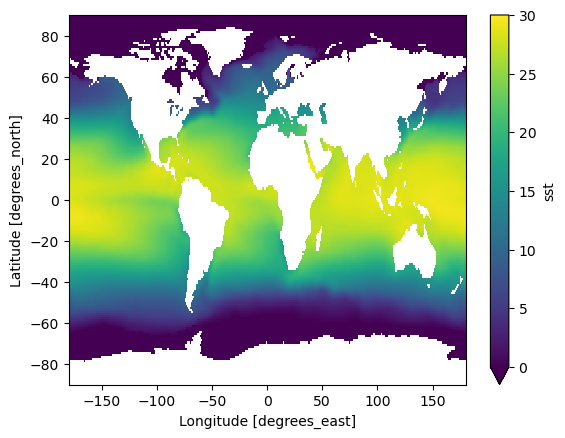

<Figure size 1800x1800 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
SST = ds["sst"]
print(SST.values)                   #PRINTING THE SST VALUES
sp_mean = SST.mean(dim = ['time'])
sp_mean.plot(vmin=0,vmax=30)        #DEFINING THE COLOR BAR RANGE
plt.figure(figsize=(12, 12),dpi=150)#SHAPING THE MAP SIZE

**TIME SERIES PLOT THE EL NINO 3.4 AREA**

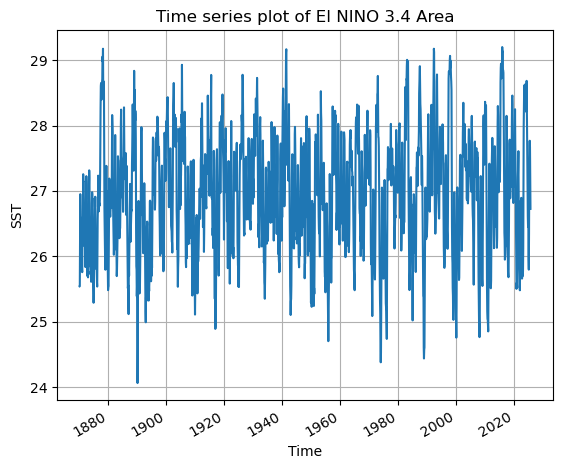

In [19]:
import numpy as np
#lat_range = (5,-5)  
#lon_range = (120, 170)
regional_sst = SST.sel(latitude=slice(5,-5), longitude=slice(-170,-120))  # SLICING THE LATITUDE AND LONGITUDE
areal_mean = regional_sst.mean(dim = ['latitude','longitude'])            #CALCULATING THE AREAL MEAN 
areal_mean.plot()
plt.xlabel('Time')
plt.ylabel('SST')
plt.title('Time series plot of El NINO 3.4 Area')
plt.grid(True)

**TAKING INTO CONSIDERATION THE 10 YEARS OF DATA (2005-2015)**

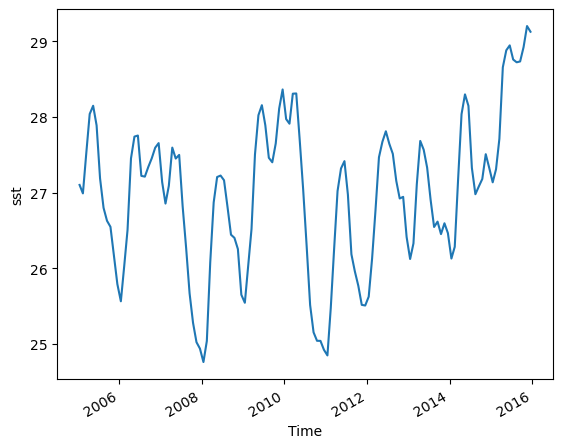

In [21]:
region = areal_mean.sel(time = slice('2005-01-01','2015-12-31'))

region.plot()

**CALCULATING THE BIASED VARIANCE WITHOUT USING DIRECT FORMULA**

In [40]:
mean_total = np.mean(areal_mean)    #CALCULAITNG THE TOTAL MEAN OF THE AREA USING np.mean


sq_mean = (areal_mean - mean_total)**2   #HERE , WE ARE FIRST SUBTRACTING THE X(i) VALUES FROM X BAR 
mean_2 = np.sum(sq_mean)/len(areal_mean) # THEN SUMMING UP THE DIFFERENCE AND DIVIDING BY THE TOTAL LENGTH OF THE AREA
print('The value of biased variance is',mean_2.values)
    


The value of biased variance is 0.8021114765959583


**CALCULATION OF VARIANCE USING DIRECT FORMULA**

In [41]:
variance = np.var(areal_mean)
print(variance.values)

0.8021113276481628


**CALCULATION OF UNBIASED VARIANCE**

In [42]:
sq_mean = (areal_mean - mean_total)**2
mean_2 = np.sum(sq_mean)/(len(areal_mean)-1)   #FOR UNBIASED , WE WILL TAKE N-1 , INSTEAD OF N 
print('The value of the unbiased variance',mean_2.values)
    



The value of the unbiased variance 0.802541102453803
